# Calibrate Camera

In [7]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

def calibrate_camera():
    """
    Calibrate camera using pre-captured images
    https://docs.opencv2.org/3.4.0/dc/dbb/tutorial_py_calibration.html
    """
    nx = 6
    ny = 9
    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    images = glob.glob('camera_cal/calibration*.jpg')
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
        # If found, add object points, image points (after refining them)
        if ret == True:
            objpoints.append(objp)
            corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
            imgpoints.append(corners)
            # Draw and display the corners
            #cv2.drawChessboardCorners(img, (nx,ny), corners2, ret)
            #cv2.imshow('img', img)
            #cv2.waitKey(500)
    #cv2.destroyAllWindows()
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist
    
def test_camera(mtx, dist, filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h,  w = img.shape[:2]
    # return undistorted image with minimum unwanted pixels. It's okay to remove some pixesl at image corners.
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))
    
    undist = cv2.undistort(img, mtx, dist, None, newcameramtx)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undist)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

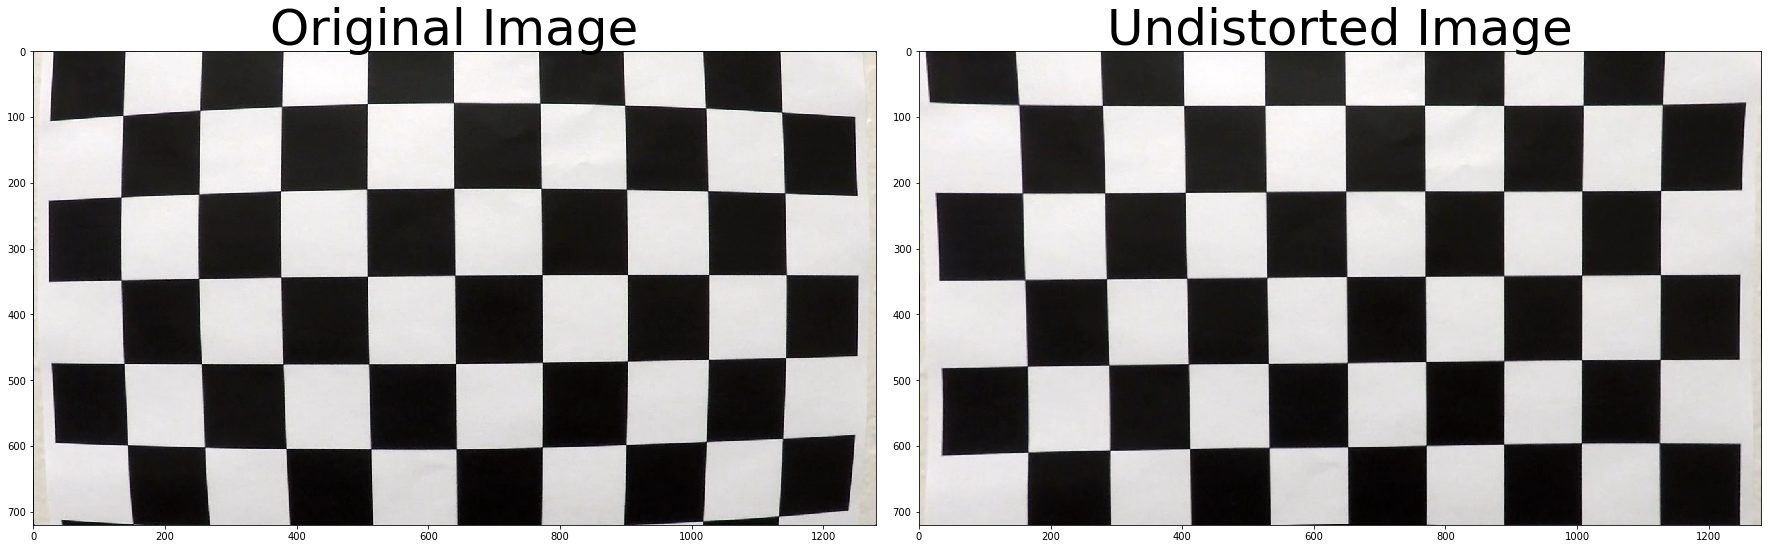

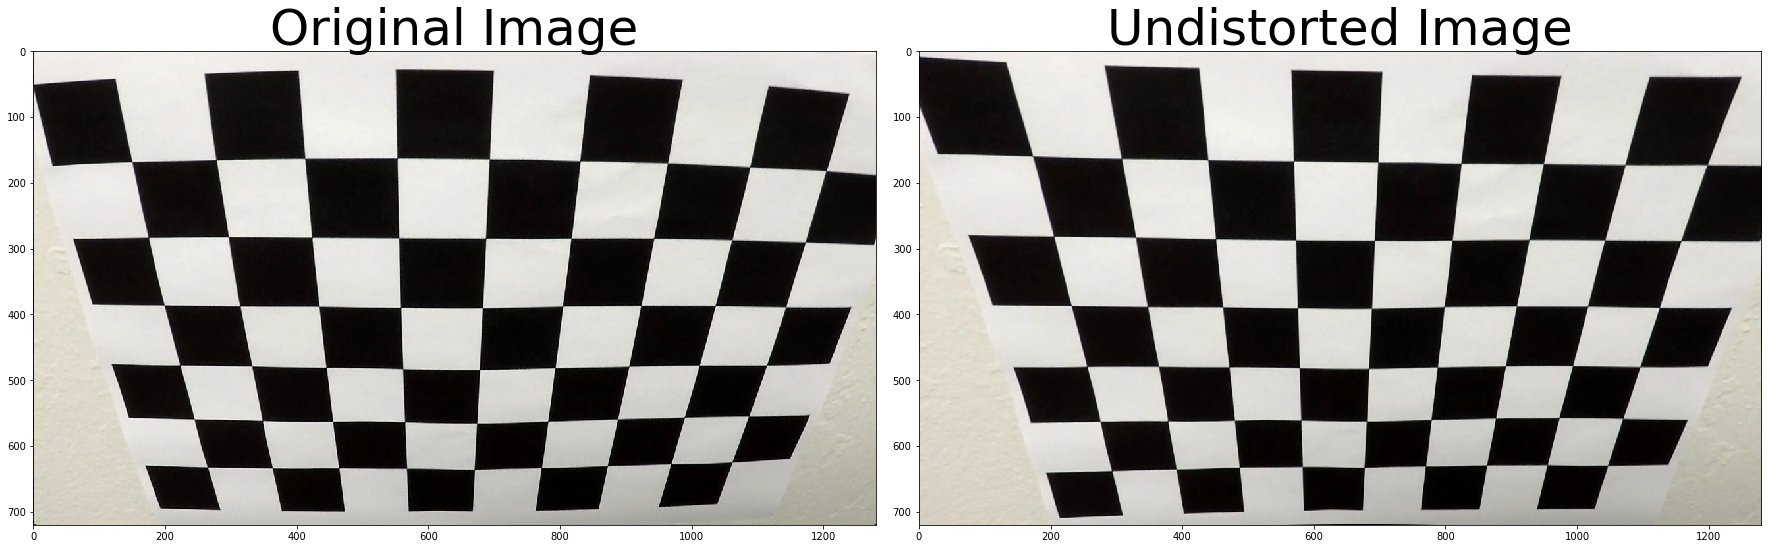

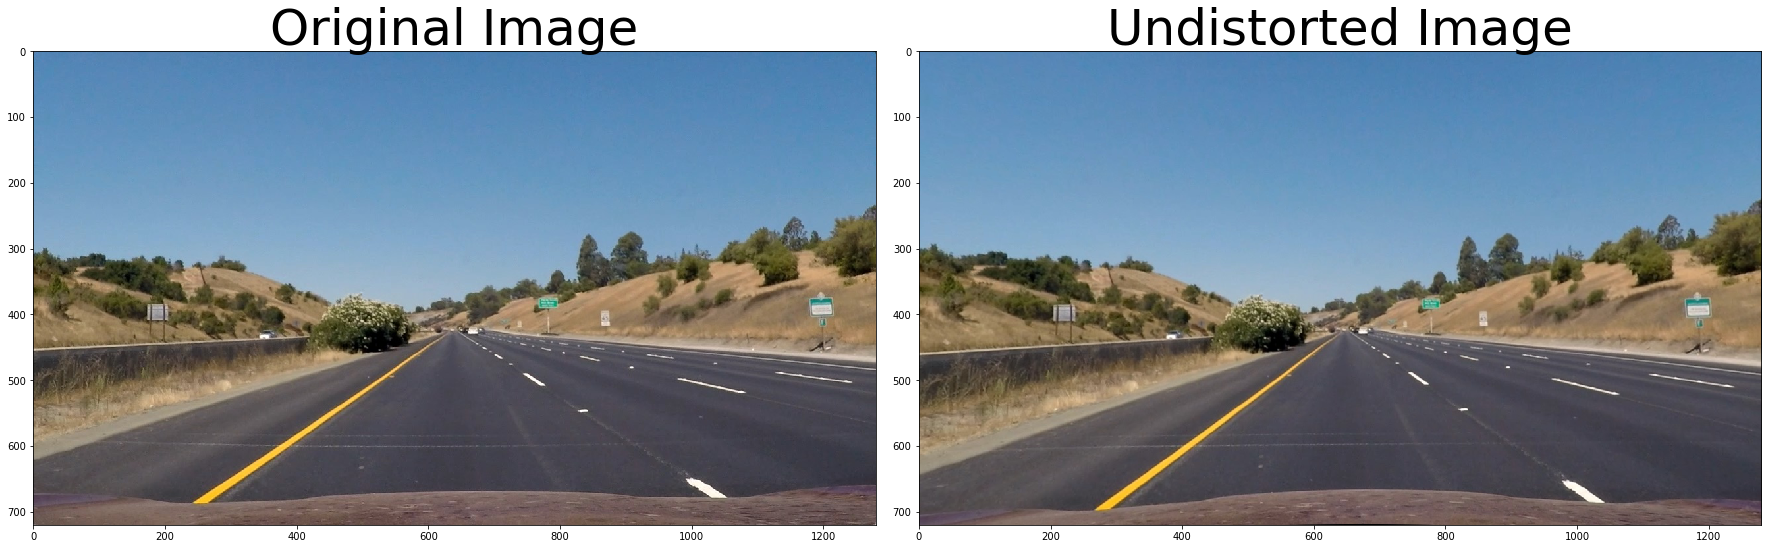

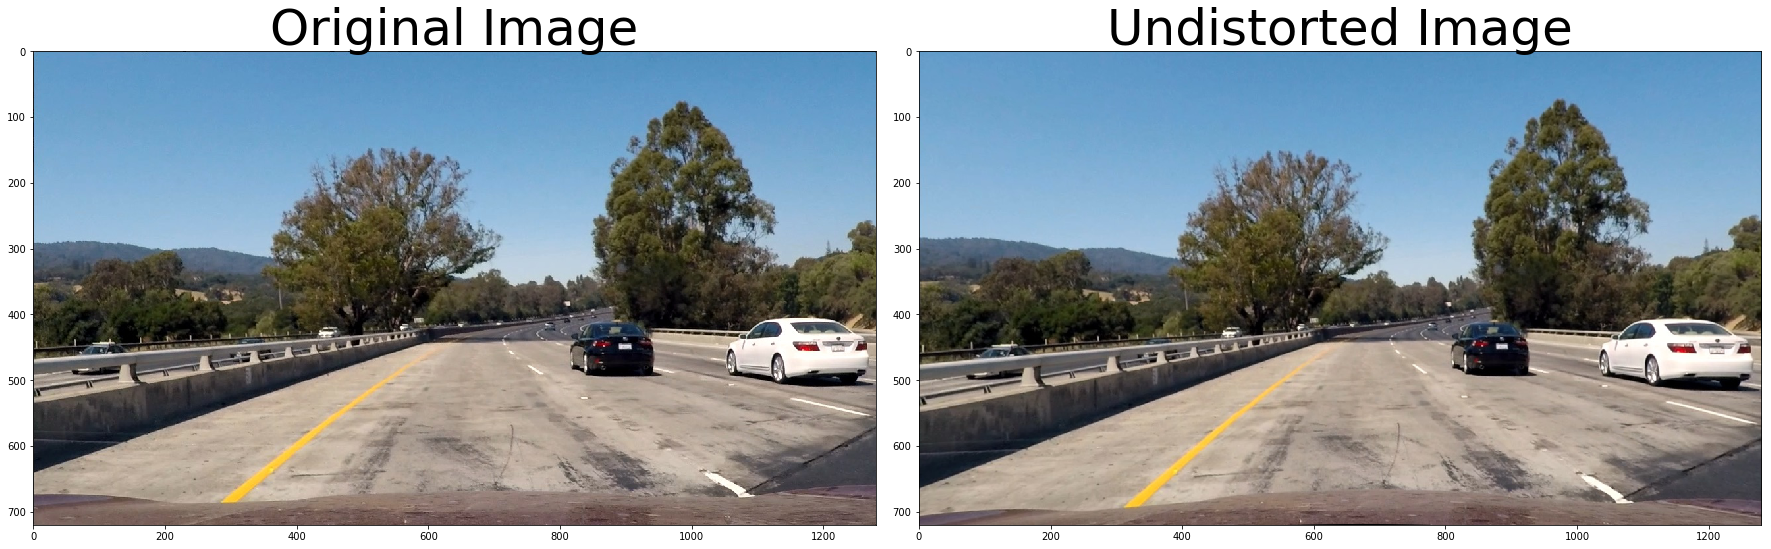

In [8]:
# Calibrate and test on multiple images
mtx, dist = calibrate_camera()
test_camera(mtx, dist, 'camera_cal/calibration1.jpg')
test_camera(mtx, dist, 'camera_cal/calibration2.jpg')
test_camera(mtx, dist, 'test_images/straight_lines1.jpg')
test_camera(mtx, dist, 'test_images/test1.jpg')